In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils import show_images, mask_img

src = cv2.imread('./image/cow.jpg', -1)

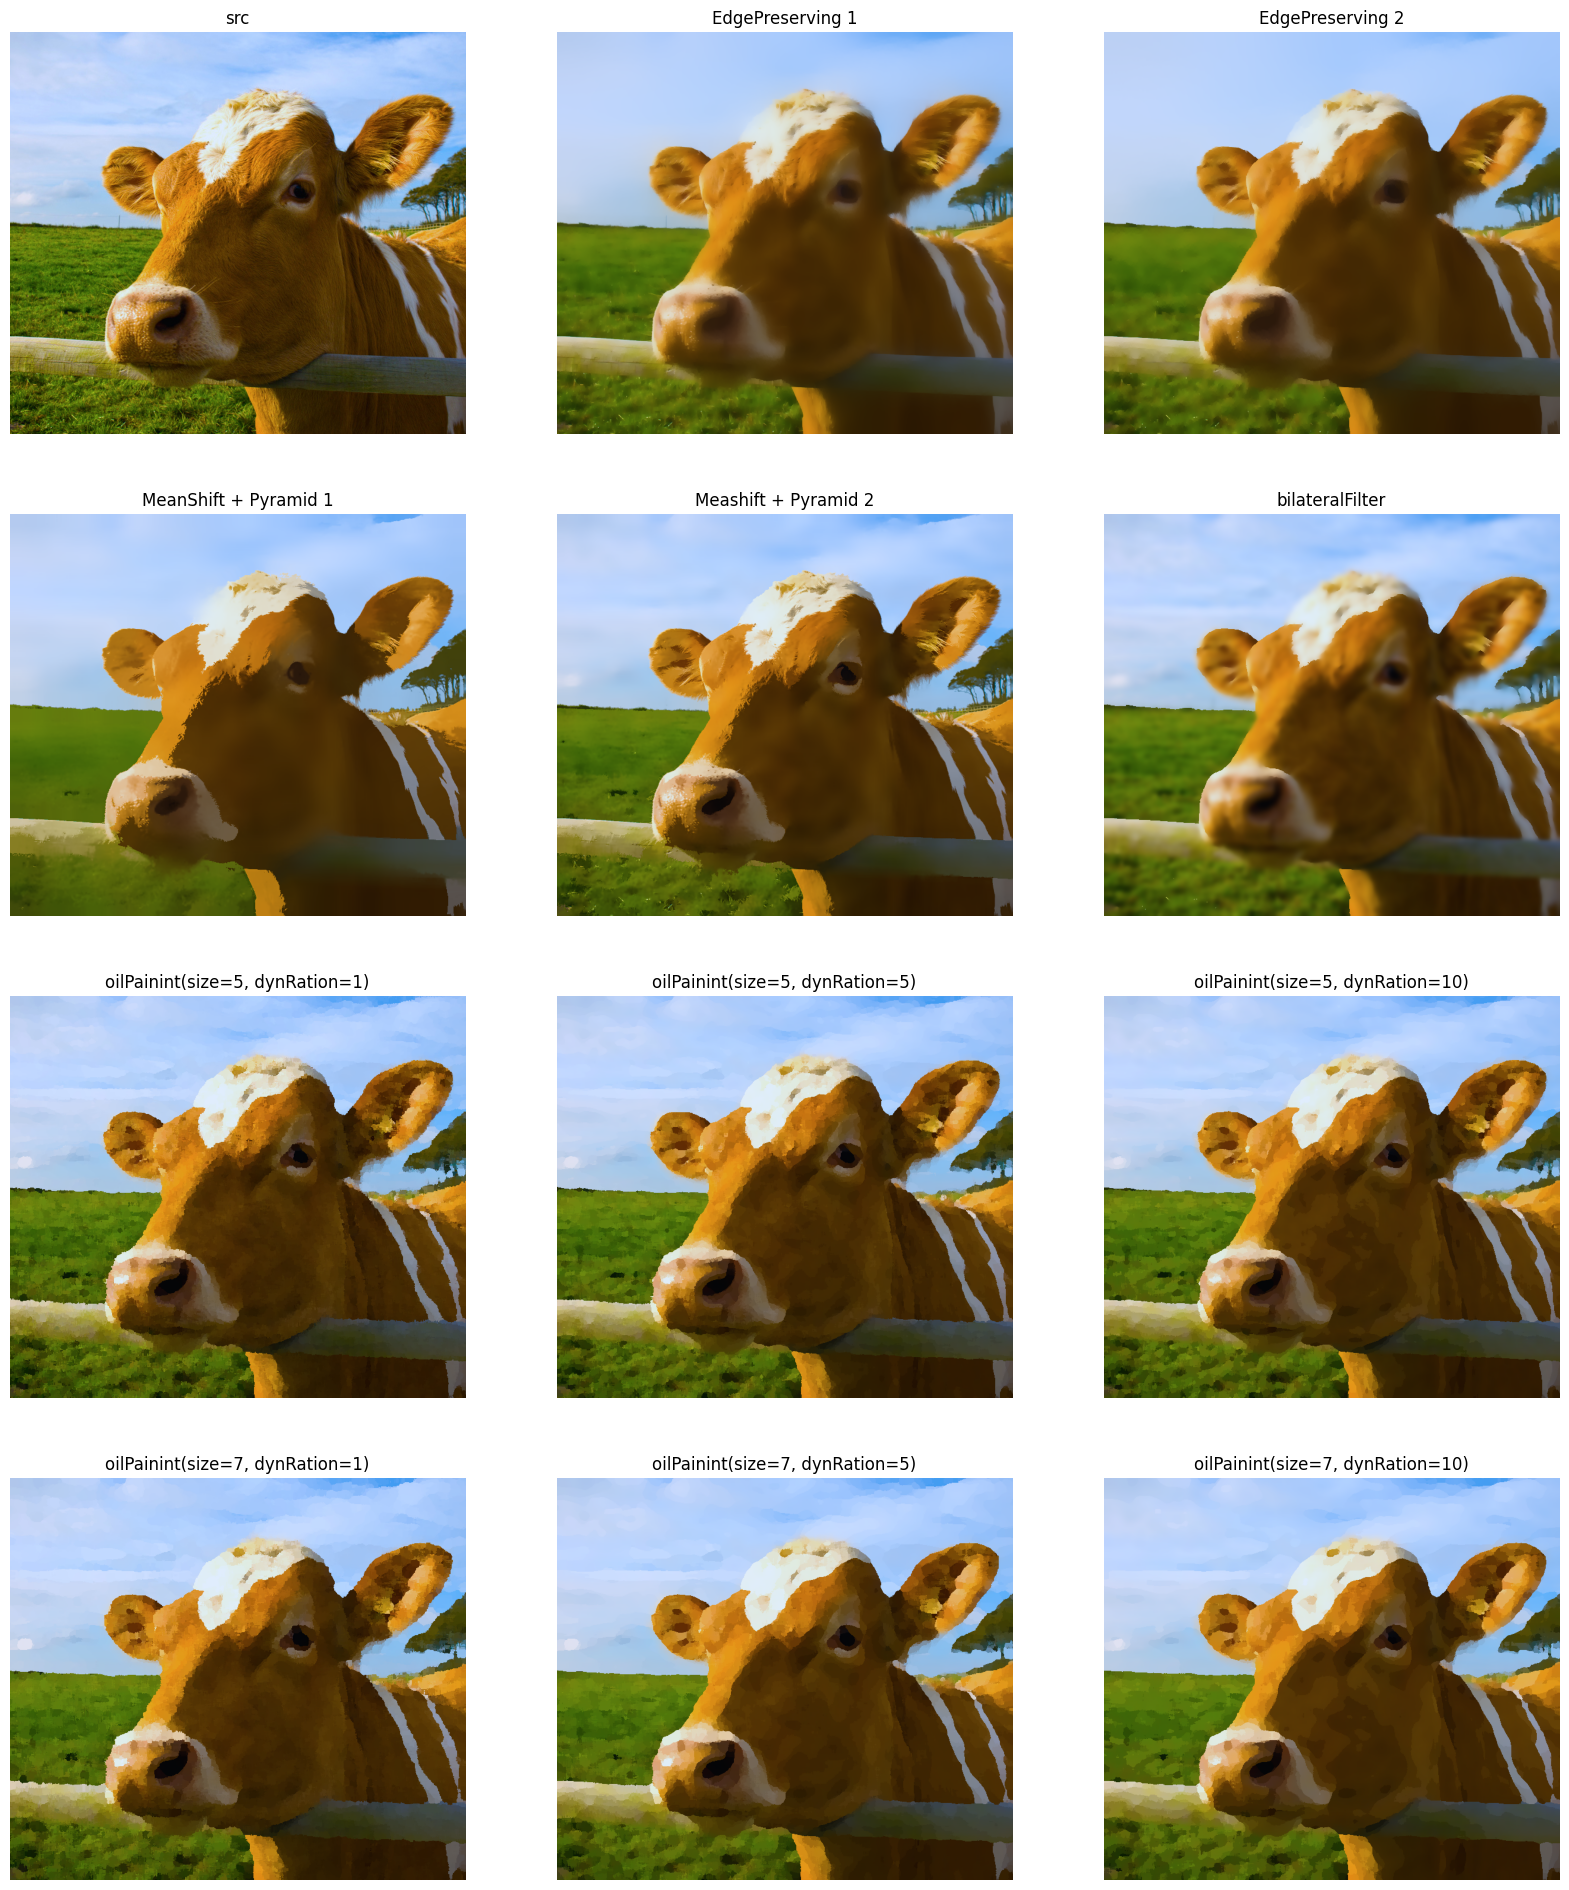

In [24]:
# 水彩画/油画风格：成块状，块与块之间没有突兀的黑边

result = [('src', src)]

# 频域上的保边滤波 edgePreserving；速度相当快，其中 RECURS 速度好于 NORMCONV
out1 = cv2.edgePreservingFilter(src, flags=cv2.RECURS_FILTER, sigma_s=100, sigma_r=0.5)
out2 = cv2.edgePreservingFilter(src, flags=cv2.NORMCONV_FILTER, sigma_s=100, sigma_r=0.5)
result.extend([('EdgePreserving 1', out1), ('EdgePreserving 2', out2)])

# Meanshift + Pyramid
out3 = cv2.pyrMeanShiftFiltering(src, 21, 51)
out4 = cv2.pyrMeanShiftFiltering(src, 11, 31)
result.extend([('MeanShift + Pyramid 1', out3), ('Meashift + Pyramid 2', out4)])

# 多次在空域上保边滤波，很慢（可以用金字塔来加速）
out5 = np.copy(src)
# for _ in range(1):
#     out5 = cv2.pyrDown(out5)
for _ in range(7):
    out5 = cv2.bilateralFilter(out5, d=7, sigmaSpace=75, sigmaColor=70)
# for _ in range(1):
#     out5 = cv2.pyrUp(out5)
result.append(('bilateralFilter', out5))

# xphoto OilPainting
for i in [5, 7]:
    for j in [1, 5, 10]:
        out = cv2.xphoto.oilPainting(src, size=i, dynRatio=j)
        result.append((f'oilPainint(size={i}, dynRation={j})', out))

show_images(result, colnum=3, scale=20)

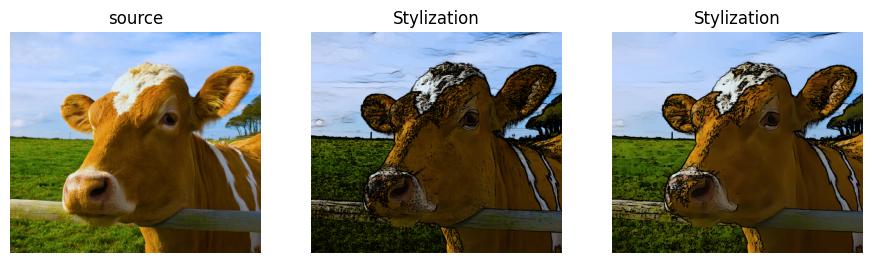

In [19]:
# 硬笔卡通画风格：成块状，块与块之间有明显的黑边

# 频域上的保边滤波（用了 edgePreservingFilter）
out1 = cv2.stylization(src, sigma_s=60, sigma_r=0.07)
out2 = cv2.stylization(src, sigma_s=60, sigma_r=0.20)


show_images([
    ('source', src),
    ('Stylization', out1),
    ('Stylization', out2),
], colnum=3, scale=3)

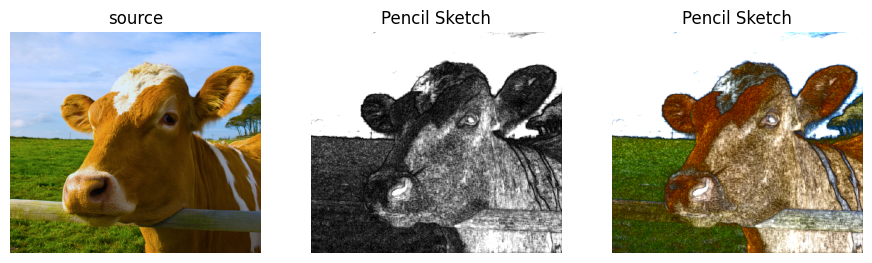

In [18]:
# 铅笔素描风格
dst_gray, dst_color = cv2.pencilSketch(src, sigma_s=60, sigma_r=0.07, shade_factor=0.05)

show_images([
    ('source', src),
    ('Pencil Sketch', dst_gray),
    ('Pencil Sketch', dst_color),
], colnum=3, scale=3)

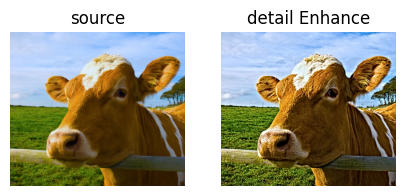

In [16]:
# 边缘增强

# 本质上是对边缘进行锐化增强，这里直接用的 detailEnhance，背后是频率保边滤波 edgePreservingFilter
dst = cv2.detailEnhance(src, sigma_s=10, sigma_r=0.15)

show_images([
    ('source', src),
    ('detail Enhance', dst),
], colnum=3, scale=2)

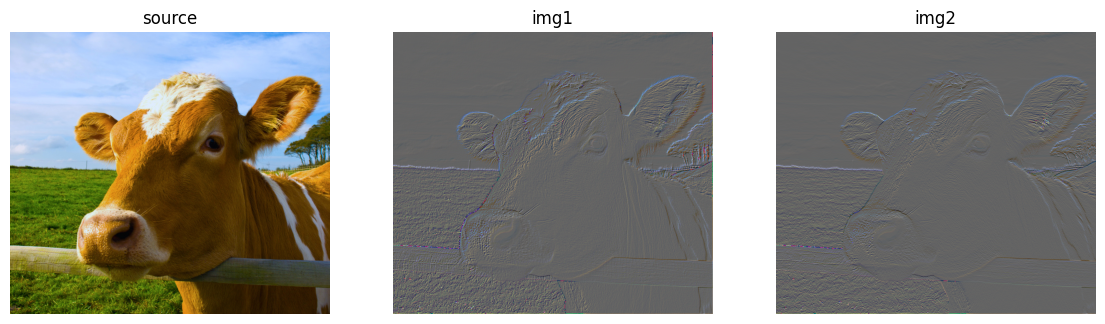

In [26]:
# 浮雕：本质上就是中间的点减去周围的一个点
from scipy.signal import convolve2d

img1 = np.zeros_like(src)
K1 = np.array([[-1, 0, 0], [0, 1, 0], [0, 0, 0]])
for i in range(3):
    img1[..., i] = convolve2d(src[..., i], K1, mode='same') + 100

img2 = np.zeros_like(src)
K2 = np.array([[0, -1, 0], [0, 1, 0], [0, 0, 0]])
for i in range(3):
    img2[..., i] = convolve2d(src[..., i], K2, mode='same') + 100

show_images([
    ('source', src),
    ('img1', img1),
    ('img2', img2),
], colnum=3, scale=4)

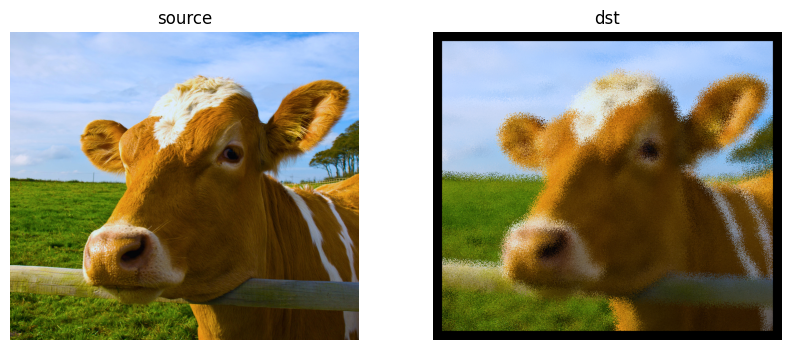

In [25]:
# 毛玻璃：

rows, cols = src.shape[0:2]

dst = np.zeros_like(src)
for i in range(20, rows-20):
    for j in range(20, cols-20):
        nowr = int(np.random.random() * 20)
        nowc = int(np.random.random() * 20)
        dst[i, j] = src[i+nowr, j+nowc]

show_images([
    ('source', src),
    ('dst', dst),
], colnum=3, scale=4)